# 데이터 로딩 및 데이터셋 구축

In [ ]:
!pip install pytube pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Google Colab에서 구글 드라이브를 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
from pytube import YouTube
import requests
from PIL import Image
import io

# 구글 드라이브에 저장할 경로 설정
drive_path = '/content/drive/MyDrive/2024 소융대 학술제'  # 실제 구글 드라이브 경로로 변경
thumbnail_path = os.path.join(drive_path, 'thumbnails')
os.makedirs(thumbnail_path, exist_ok=True)

# 데이터 로드 (유튜브 비디오 URL 목록)
video_urls = [
' https://www.youtube.com/watch?v=7nDBOziW28A ',
' https://www.youtube.com/watch?v=Hx9KyUXLrWE ',
' https://www.youtube.com/watch?v=wecpRs9p00E ',
' https://www.youtube.com/watch?v=8r-_4flpZOo ',
' https://www.youtube.com/watch?v=w4iQ7nWO6SM ',
' https://www.youtube.com/watch?v=Y6cQgRQ7g24 ',
' https://www.youtube.com/watch?v=t8P-zdkoeJA ',
' https://www.youtube.com/watch?v=s8Y-mf8K0wI ',
' https://www.youtube.com/watch?v=DIPxnt5vnhU ',
' https://www.youtube.com/watch?v=S8bQtknSNW0 ',
' https://www.youtube.com/watch?v=pbELDkeLdho ',
' https://www.youtube.com/watch?v=vBJVWOOsB4A ',
' https://www.youtube.com/watch?v=vJF9kJxQpBY ',
' https://www.youtube.com/watch?v=TC3tnkpjEIE ',
' https://www.youtube.com/watch?v=MLnl7KSiJQY ',
' https://www.youtube.com/watch?v=IMWT6937uUs ',
' https://www.youtube.com/watch?v=FIJpCghLTG8 ',
' https://www.youtube.com/watch?v=aJwWKQr3oIQ ',
' https://www.youtube.com/watch?v=Iq4Ur-7RIY4 ',
' https://www.youtube.com/watch?v=-0zhsjfCJ2o ',
' https://www.youtube.com/watch?v=9gr2kaSBFRM ',
' https://www.youtube.com/watch?v=i_bJwt7uTwQ ',
' https://www.youtube.com/watch?v=BahC2CxQzD0 ',
' https://www.youtube.com/watch?v=F5YmLkh8nV4 ',
' https://www.youtube.com/watch?v=UwTHicUZPY8 ',
' https://www.youtube.com/watch?v=dXwpnnHvTCM ',
' https://www.youtube.com/watch?v=P9KqxcQnAgw ',
' https://www.youtube.com/watch?v=frI-Mm9CMHs ',
' https://www.youtube.com/watch?v=g1X6m_gqYOQ ',
' https://www.youtube.com/watch?v=AzRt41Irti4 ',
' https://www.youtube.com/watch?v=wfFuPhcvlOE ',
' https://www.youtube.com/watch?v=W8DqHgo43Fo ',
' https://www.youtube.com/watch?v=faaRBJDOOgs ',
' https://www.youtube.com/watch?v=rAE4tYftFfo ',
' https://www.youtube.com/watch?v=lFBXMrgEr5o ',
' https://www.youtube.com/watch?v=x11mJK1rMb4&t=50s ',
' https://www.youtube.com/watch?v=fMv8-gZCtIU ',
' https://www.youtube.com/watch?v=EUe0L_G3HB8 ',
' https://www.youtube.com/watch?v=7L1VGzFZ3jQ&t=31s ',
' https://www.youtube.com/watch?v=A8j5Tk0M5NQ ',
' https://www.youtube.com/watch?v=TFT1D0c_XFM ',
' https://www.youtube.com/watch?v=IH7F9vITYmw ',
' https://www.youtube.com/watch?v=qqo3PKu9N8Q ',
' https://www.youtube.com/watch?v=wfFuPhcvlOE&t=11s ',
' https://www.youtube.com/watch?v=KTA9IE8jPP4&t=13s ',
' https://www.youtube.com/watch?v=_HIe1nGVngo&t=1019s ',
' https://www.youtube.com/watch?v=Z_JRWd0koas ',
' https://www.youtube.com/watch?v=rskWUzTU5eA ',
' https://www.youtube.com/watch?v=5GAIS9jCwzY ',
' https://www.youtube.com/watch?v=PQvfPQDvYGI ',
' https://www.youtube.com/watch?v=BLP-xJAf6GE ',
' https://www.youtube.com/watch?v=ByWxOHmd03M ',
' https://www.youtube.com/watch?v=x_p0bUeV2EE ',
' https://www.youtube.com/watch?v=bwDm6_lre2I ',
' https://www.youtube.com/watch?v=p4LMD_4SKic ',
' https://www.youtube.com/watch?v=ADqj-jUEW30 ',
' https://www.youtube.com/watch?v=OO2GKqyWi-M&t=82s ',
' https://www.youtube.com/watch?v=DW6R70iDuOQ ',
' https://www.youtube.com/watch?v=2MbkJPlzzos ',
' https://www.youtube.com/watch?v=93xK2hsEZes ',
' https://www.youtube.com/watch?v=M96mp5yFE80 ',
' https://www.youtube.com/watch?v=C0uE1EoOzDc ',
' https://www.youtube.com/watch?v=grh8lAz372E ',
' https://www.youtube.com/watch?v=X8enCDafirg ',
' https://www.youtube.com/watch?v=LKJEVcURv5U ',
' https://www.youtube.com/watch?v=MQ4kjXKw20w ',
' https://www.youtube.com/watch?v=VPcW8OfT6Js ',
' https://www.youtube.com/watch?v=0CoGtqD5d8Y ',
' https://www.youtube.com/watch?v=8Ijd4Y5BbvA ',
' https://www.youtube.com/watch?v=yPgLQtbYwPc ',
' https://www.youtube.com/watch?v=GUKQWs7jtAU ',
' https://www.youtube.com/watch?v=7btkQnzmUcI ',
' https://www.youtube.com/watch?v=ntynQXyhSAM ',
' https://www.youtube.com/watch?v=6HRVqEJPwEU ',
' https://www.youtube.com/watch?v=A5ioTzYDMUQ ',
' https://www.youtube.com/watch?v=7U_VmG0r2co ',
' https://www.youtube.com/watch?v=63dYHAXZb44 ',
' https://www.youtube.com/watch?v=RCqyMWkmQOs ',
' https://www.youtube.com/watch?v=gSURD6EA5js ',
' https://www.youtube.com/watch?v=ubdDPL3sTBo ',
' https://www.youtube.com/watch?v=y7SOA01WQWs ',
' https://www.youtube.com/watch?v=wicb2udKMNI ',
' https://www.youtube.com/watch?v=oowSZRYGWLk ',
' https://www.youtube.com/watch?v=mlfJwOlXQ3c&t=95s ',
' https://www.youtube.com/watch?v=8hriUG9nr0w ',
' https://www.youtube.com/watch?v=WIQaRaQ36VE ',
' https://www.youtube.com/watch?v=VxGCwbCOuK8 ',
' https://www.youtube.com/watch?v=YlWdFpkOFp4 ',
' https://www.youtube.com/watch?v=P8F_kqpPDWc ',
' https://www.youtube.com/watch?v=q640K68i9Lk ',
' https://www.youtube.com/watch?v=EQ8_P42NFZ8 ',
' https://www.youtube.com/watch?v=U2vnDyA0tSY ',
' https://www.youtube.com/watch?v=v8McoXcJ_y4 ',
' https://www.youtube.com/watch?v=Bz_Rp7iFZnM ',
' https://www.youtube.com/watch?v=xT06UlgF_3M ',
' https://www.youtube.com/watch?v=rQkIYgaimPg ',
' https://www.youtube.com/watch?v=AVLrY69ZVio ',
' https://www.youtube.com/watch?v=BKgxZ3x7SO8 ',
' https://www.youtube.com/watch?v=kmIiJan-opM ',
' https://www.youtube.com/watch?v=mDPZwjqlsmk ',
' https://www.youtube.com/watch?v=hu_mqOeGiFA ',
' https://www.youtube.com/watch?v=Z6l4y-pjM0A ',
' https://www.youtube.com/watch?v=kmIiJan-opM&t=2s ',
' https://www.youtube.com/watch?v=jX5RfXcju0g ',
' https://www.youtube.com/watch?v=mSGf6eMCW-s ',
' https://www.youtube.com/watch?v=1T6qGvGpTUs ',
' https://www.youtube.com/watch?v=pyLGys7tmbI ',
' https://www.youtube.com/watch?v=unPXQ8lE9w8?si=4gPD8hYGGIoZvjmC ',
' https://www.youtube.com/watch?v=b_tu3allU1o ',
' https://www.youtube.com/watch?v=ozPtRVYiP-g ',
' https://www.youtube.com/watch?v=JBP9-4Dh4Ic?si=bpRU82sMh8qdt85e ',
' https://www.youtube.com/watch?v=gUUCcppHTo4?si=5DNDhlw2MZaHavfG ',
' https://www.youtube.com/watch?v=yFZoenQim0s?si=rBg8rnFy5LkQutI8 ',
' https://www.youtube.com/watch?v=0-gUTVoRrHM?si=dJ2Dph4a40z_uvva ',
' https://www.youtube.com/watch?v=3PgcmbzPREA?si=RFPA3kcMAipLslRw ',
' https://www.youtube.com/watch?v=pG9K6o5YcGk?si=FzKn4zzpmV1EpY67 ',
' https://www.youtube.com/watch?v=b2hSQj-91M0?si=-6QKj9RtPFU3aSDr ',
' https://www.youtube.com/watch?v=M9vP9MdT-M0?si=EBgkIuRso_xIyurA ',
' https://www.youtube.com/watch?v=jOw-a9yDcxc?si=jpc3LslPO1ZfPhrW ',
' https://www.youtube.com/watch?v=mxYvTa6If3k?si=lbyaTwQ0vWQiOwTM ',
' https://www.youtube.com/watch?v=fKpI96qSRvQ?si=QW5-IbQO8vobF5Xm ',
' https://www.youtube.com/watch?v=aFI7iv-oJ9Y?si=BzRS3ywlifDNaFrA ',
' https://www.youtube.com/watch?v=RAMmLllvZlo?si=dydfFroAP818r98i ',
' https://www.youtube.com/watch?v=8KnfhZnEPfg?si=ALqvKXoui2uoNivw ',
' https://www.youtube.com/watch?v=bKEigzj2kwg?si=sFBoQNP0IcMAEePK ',
' https://www.youtube.com/watch?v=6Qv2NqnIbgs?si=Bu5oD8SswdHTen8t ',
' https://www.youtube.com/watch?v=r6cH7oPvjHM?si=pVwIbuU-AuUaYqRN ',
' https://www.youtube.com/watch?v=1BguRMQGNRw?si=7_adYnjAfGa7Mfuy ',
' https://www.youtube.com/watch?v=fBWilIZr6Z4?si=4s3auINJfjEEgR0T ',
' https://www.youtube.com/watch?v=66wEVb1Z1ho?si=r1t1p_6e9X5qae3e ',
' https://www.youtube.com/watch?v=YgdcizeILzQ?si=1fZsgglPcHzVbS42 ',
' https://www.youtube.com/watch?v=lacRtnBfRD8?si=XQCSzUcWALiCpII5 ',
' https://www.youtube.com/watch?v=YcEKGZFS-Mw?si=w9e87l7YFMhbmUIX ',
' https://www.youtube.com/watch?v=WzxIUvWYObY?si=e4g35xaiOcYZVn08 ',
' https://www.youtube.com/watch?v=9UgzXfpzRZQ?si=JLFUBSI9KO3yT562 ',
' https://www.youtube.com/watch?v=UUqDcWZs2e8?si=zlipWy1IWGMJz5Xw ',
' https://www.youtube.com/watch?v=Rx6jQN9A2XQ?si=QHnuy_pnIxXrcoPz ',
' https://www.youtube.com/watch?v=1IK7AJQ_-oE?si=83JFEoALoxeA7aFt ',
' https://www.youtube.com/watch?v=XwErW3RwzJk?si=FXB01Sf-f2cWDRB1 ',
' https://www.youtube.com/watch?v=aPe2M8FKJmU?si=NEvPryKXfAMdtS4y ',
' https://www.youtube.com/watch?v=pVUB0e8_zcU?si=X6Q0YgV0yL_-HsF8 ',
' https://www.youtube.com/watch?v=J22e6h3sgYE?si=aglU_vmGMQQXkQqk ',
' https://www.youtube.com/watch?v=qHJgsAFBs10?si=6vzVDaTROkL9bb3k ',
' https://www.youtube.com/watch?v=Fdj8-uVRvj8?si=4P88Ig0Vr-Ke9niT ',
' https://www.youtube.com/watch?v=GtURV_l0LSo?si=es715Qgue0j_s5GR ',
' https://www.youtube.com/watch?v=eUgPbD07QVk?si=-Wu5-kKX6lNzse6F ',
' https://www.youtube.com/watch?v=6UPiY3sz2Gg?si=p60t_7xYp5Efzgzy ',
' https://www.youtube.com/watch?v=gmxROyEb-KY?si=6Idtc0wHYeT_-whv ',
' https://www.youtube.com/watch?v=FFyqbOKzqWg?si=WH-7LE86t4lDhysv ',
' https://www.youtube.com/watch?v=EqeBZNQ9_2I?si=2_uB5D5zPv_q7PhD ',
' https://www.youtube.com/watch?v=XDftT-KgbLI?si=t-FKOKpB23PSchbL ',
' https://www.youtube.com/watch?v=e2ov0b7hOmQ?si=VWjidiFDT5PGS5Rx ',
' https://www.youtube.com/watch?v=YPF60u2mnQg?si=3Fe76aAxmhDI9TOD ',
' https://www.youtube.com/watch?v=J-UvbpSZokk?si=X3bLQWSr7aAy6PZq ',
' https://www.youtube.com/watch?v=jo-b8sQz2HY?si=vhPffvYsy_JUHMJd ',
' https://www.youtube.com/watch?v=aPe2M8FKJmU?si=oeKwjq02HO5ialuy ',
' https://www.youtube.com/watch?v=aebtTTXWkaU?si=aIVg4OkHVLdgOBC2 ',
' https://www.youtube.com/watch?v=hOf-If7gZVY?si=R5ilsFjBamTY22lM ',
' https://www.youtube.com/watch?v=vpot-GMTloc?si=drknLNkHKfwghmDI ',
' https://www.youtube.com/watch?v=DnsshZFrzqE?si=Ab0ny6xTzio8-y5D ',
' https://www.youtube.com/watch?v=xhI4Qrg0M2M?si=g3Yv7U0e5HlREuW1 ',
' https://www.youtube.com/watch?v=t5k3H7ZwD0g?si=TD2Hi_QkLWZ03zOz ',
' https://www.youtube.com/watch?v=cqoiaGjrxhw?si=0EiIWxzurhmtrNxC ',
' https://www.youtube.com/watch?v=IgD_Jfb3wh0?si=a4XSdeMAke29ILTs ',
' https://www.youtube.com/watch?v=kfuTxf7Ib6E?si=ceK-2Zao8BXk14JQ ',
' https://www.youtube.com/watch?v=MrlfO87EfQY?si=Rku33LNYEgyZhbnc ',
' https://www.youtube.com/watch?v=MuF7AQ5Bt6s?si=g6Vfmi3jUjFEun9F ',
' https://www.youtube.com/watch?v=3EgxXnabgvA?si=sgaiUMG0rHZyFcwL ',
' https://www.youtube.com/watch?v=7ZqF62BBg3I?si=lSPH1gSnSifcbdAY ',
' https://www.youtube.com/watch?v=tvjHCnhArDg?si=96KkgEv0iujTJF6X ',
' https://www.youtube.com/watch?v=LbXnW6ntIbQ?si=ME7DBYZKwvRO0tpp ',
' https://www.youtube.com/watch?v=6sG9dH7wkJ4?si=UiYQpj5MUpnQu2Xu ',
' https://www.youtube.com/watch?v=gh0yJECViS8?si=LDLOpLF9vjMhvm-2 ',
' https://www.youtube.com/watch?v=KxAPCwHWLcY?si=7C3CSYZtJRLqeaCG ',
' https://www.youtube.com/watch?v=L9sypnpsiDA?si=ByMAO94JyZNdGFEg ',
' https://www.youtube.com/watch?v=HKBnSVsf6Zw?si=41a51Nu1728G3m_k ',
' https://www.youtube.com/watch?v=JYYseEmYhm4?si=-6cf2Tg-Js4wXy89 ',
' https://www.youtube.com/watch?v=nmP992ISQrE?si=CFG92YHEHSrVgDVo ',
' https://www.youtube.com/watch?v=c6Eyyk5JxBc?si=enE3U1T8IDWkjOxz ',
' https://www.youtube.com/watch?v=7HPbryxlxqs?si=3iCoLjd5BJMis6Ky ',
' https://www.youtube.com/watch?v=3gfT77F1Bak?si=3L2XVuhD7caW99nJ ',
' https://www.youtube.com/watch?v=5i76n30SeEQ?si=dgseQJOehQDUuuiq ',
' https://www.youtube.com/watch?v=YQP83dL3zU8?si=VFSWWeLF9gAbNzuL ',
' https://www.youtube.com/watch?v=dWC7qFKKpp0?si=06nfuYMauA_8T0oA ',
' https://www.youtube.com/watch?v=avwmtFOR4lc?si=agejfRnfWtQCTwKg ',
' https://www.youtube.com/watch?v=t9mOvIoyW4Q?si=4F2FSCPSO7MDgIQ3 ',
' https://www.youtube.com/watch?v=0eaf2ZWCBKc?si=5IPIhebw2yIsaTOg ',
' https://www.youtube.com/watch?v=QLjNVPE7ohI?si=dEeVHCON0jjXf04N ',
' https://www.youtube.com/watch?v=VOc-BVG2XKg?si=asWAqFnWj2G4BphX ',
' https://www.youtube.com/watch?v=j_XTCoE4MO4?si=msGfOuTwL_7l1ehi ',
' https://www.youtube.com/watch?v=18nISxn5qxU?si=SVO5hHU0Pgbq_OQC ',
' https://www.youtube.com/watch?v=udt62tWP7EY?si=NgaQvZZpGKvBq2wg ',
' https://www.youtube.com/watch?v=qauJvcaPOTk?si=iDIwTiylGQIJbFJt ',
' https://www.youtube.com/watch?v=GgE7AkXSR8U?si=_PnKooQZbN6PNNLW ',
' https://www.youtube.com/watch?v=VwsvdBKECSc?si=SyVK4Ecl_ZxbNM3L ',
' https://www.youtube.com/watch?v=oq-EQnP5Afk?si=opvHPptnODY04RCp0 ',
' https://www.youtube.com/watch?v=cBhw8lbJDIs?si=YN5NE-mgZbGAy_Yf ',
' https://www.youtube.com/watch?v=wfFuPhcvlOE?si=V1ZeMA3Rt5BUNLPP ',
' https://www.youtube.com/watch?v=1pDr9QiKsPI?si=vbcdtfZ2SeXNTMi0 ',
' https://www.youtube.com/watch?v=n-0xnkMDDy4?si=THFNPj3xP8G7VLtq ',
' https://www.youtube.com/watch?v=-QEkVlPkXFQ?si=LALdg1yFmQdNBXik ',
' https://www.youtube.com/watch?v=dE-1XiDdwws?si=7_VSGIxnh5Pvo2Tj ',
' https://www.youtube.com/watch?v=CldsY1BZs8Y?si=VQCTDd-SBonXJHgF ',
' https://www.youtube.com/watch?v=AwUi-zNtfjA?si=0TsKgz4p3Uqkpz6B ',
' https://www.youtube.com/watch?v=X6wBqsVBDCY?si=ffeqOpDjHGRHbkM4 ',
' https://www.youtube.com/watch?v=jdZDgMnL-Ug?si=C2TwQOcB2hA1n7vx ',
' https://www.youtube.com/watch?v=BjB_7RO9hrM?si=m-5SLk1ibWAJryEO ',
' https://www.youtube.com/watch?v=jysRrz7IENc?si=suS6CyeKc__uc4yZ ',
' https://www.youtube.com/watch?v=ZMSr1hmLGqM?si=30r_Xc8A_Olfi1XE ',
' https://www.youtube.com/watch?v=tZaSgTWEGv4?si=EYSBwMO-3VRilug9 ',
' https://www.youtube.com/watch?v=4ZlS6tAt8sY?si=fnw6ksvv8TsoIzdG ',
' https://www.youtube.com/watch?v=gJ2UDkGcpVI?si=uhE_GsM5egNdmhIt ',
' https://www.youtube.com/watch?v=VHlqoZIqAmM?si=loJ-EKIRkZCpD3Gb ',
' https://www.youtube.com/watch?v=mAQXCu_tp78?si=mG_yVUnktpfO04Qv ',
' https://www.youtube.com/watch?v=_RCq7x_gQPI?si=JTfvYZDf-ffvkQJS ',
' https://www.youtube.com/watch?v=2fZC9XWv170?si=1YG32OicU-AffyvF ',
' https://www.youtube.com/watch?v=0H2eVJRLJUA?si=LwVlryZ0bSzu0Bz6 ',
' https://www.youtube.com/watch?v=xd3RQgG5pOM?si=ftoGLeSNI7nTR700 ',
' https://www.youtube.com/watch?v=Zku2i97mw0g?si=BHWI70-fgT4zlGNN ',
' https://www.youtube.com/watch?v=OUuZ92-hlQc?si=ZmZueSZWAZuFbrdx ',
' https://www.youtube.com/watch?v=Moj70Bpf4OE?si=G8aPRh2ULl4qceo9 ',
' https://www.youtube.com/watch?v=OMt34ymHBnM?si=sBNa4UCm-7oVV7py ',
' https://www.youtube.com/watch?v=KmkM9BtKEpI?si=Q1zw7ljgU1rgug0s ',
' https://www.youtube.com/watch?v=49L8w3nlyXs?si=Pbu965pvmEiCu8MG ',
' https://www.youtube.com/watch?v=qtrazKMKTMk?si=kFaaV3ArPOcogfmL ',
' https://www.youtube.com/watch?v=ywyS4aib5-o?si=ZDXpmfTPfaaf2aeb ',
' https://www.youtube.com/watch?v=Oq03-Agit7A?si=aiYdG3acY90HsQN2 ',
' https://www.youtube.com/watch?v=Zh_NX6LLxI4?si=icVADCKTHuT62iBv ',
' https://www.youtube.com/watch?v=iY1sAaLw3LY?si=AjsTpzuOQVpYUIEL ',
' https://www.youtube.com/watch?v=PMIEwbbdedE?si=lAoUZfVf7j94kg3J ',
' https://www.youtube.com/watch?v=C2DY9iFR1eE?si=sU85cYtD30dymGea ',
' https://www.youtube.com/watch?v=qWN3XsRZ2ZE?si=vLKx5Cc4ESZdS3Yw ',
' https://www.youtube.com/watch?v=hVD73A4hnWI?si=TnpzFQKUpd46lzaC ',
' https://www.youtube.com/watch?v=wO6HjhYyHUc?si=GRPVZlMyzdfbLXfL ',
' https://www.youtube.com/watch?v=rVP8n5-5t-U?si=tvyjreOg4BClGKJA ',
' https://www.youtube.com/watch?v=QzxTdVi-eMg?si=yV0dpZc5s6dgHNRO ',
' https://www.youtube.com/watch?v=5uo3uXjA7cY?si=9AVXOc6PYRm_ENmB ',
' https://www.youtube.com/watch?v=E6B0HduvVtA?si=HWXWVJiyazj-6Kye ',
' https://www.youtube.com/watch?v=qVmz7TwYJp4?si=7ecDLP7x1P7qDmRE ',
' https://www.youtube.com/watch?v=-jtIUIGrktw?si=71Pc2u4iVo_-bqtH ',
' https://www.youtube.com/watch?v=BCb8V194O1A?si=YrFNyBc68NYdql5D ',
' https://www.youtube.com/watch?v=Kr3Rhyf0p3o?si=gkBM16CeQozEd6Fa ',
' https://www.youtube.com/watch?v=kQ1u1ATI6BY?si=FrIcvOhxrsthl1_9 ',
' https://www.youtube.com/watch?v=h1-WCLESye8?si=YKmM4TgWyoJg6Hg8 ',
' https://www.youtube.com/watch?v=K97-a103bOY?si=h_xIaytzjXDEzchs ',
' https://www.youtube.com/watch?v=w0yUqRw2KVo?si=nlfNZxtzGOisvv_X ',
' https://www.youtube.com/watch?v=Ix6Mhk1XRWY?si=dDbN0DClFyP_Xvfh ',
' https://www.youtube.com/watch?v=5tpkN9ujqUs?si=xIlsxnf1CEylCMlj ',
' https://www.youtube.com/watch?v=EiCmnIaj4u8?si=1SUQVUrV60Ydnz0e ',
' https://www.youtube.com/watch?v=Opj-ibjVPJw?si=nFUQJyG_ZcSOZ_Wy ',
' https://www.youtube.com/watch?v=xtUJQduA0oU?si=v_qfbULgb1MV6I2l ',
' https://www.youtube.com/watch?v=KRK3jVdnNHs?si=oAR7AJr_X9wO-w_X ',
' https://www.youtube.com/watch?v=EoCyr254RVg?si=fCpv9HJEkHLAkoxJ ',
' https://www.youtube.com/watch?v=bXqUnEHC2Rg?si=qmFICCpZsmZwswwR ',
' https://www.youtube.com/watch?v=x3EI5ExB78s?si=U9LyNVsZ_7UhZXfN ',
' https://www.youtube.com/watch?v=hMU8vrUMmxU?si=RrBxvkiJ9fd1TCS6 ',
' https://www.youtube.com/watch?v=bwhAcwfeaPQ?si=-bJ25H6RfcqWAdff ',
' https://www.youtube.com/watch?v=4ha5E6U828g?si=OFrYrbcXm0L--03M ',
' https://www.youtube.com/watch?v=X-GaNk4L8Uw?si=BQtTJBIJrih8ABNe ',
' https://www.youtube.com/watch?v=mLiCl61Egeo?si=4dzICKAHMMovxoKU ',
' https://www.youtube.com/watch?v=4rt_YkNy6D4?si=yoeJx7q3b86umHm5 ',
' https://www.youtube.com/watch?v=WdmaVaXejfk?si=KnK1SmWsQ6MxH29N ',
' https://www.youtube.com/watch?v=2-2VzCDAxO0?si=kKuvLmp27hTCZhzS ',
' https://www.youtube.com/watch?v=FRhtuOWOqK4?si=bSLhz32ukSz9VhoM ',
' https://www.youtube.com/watch?v=9CpFVnStpe8?si=NAQ-um7CtiId8zAp ',
' https://www.youtube.com/watch?v=eVf24UteZ-s?si=N3W_Yyz_UsdEJrPX ',
' https://www.youtube.com/watch?v=4kdZRrek4dI?si=DY-GBu7Q6znVbvTP ',
' https://youtube.com/shorts/qS1S8p4at7k?si=NO0YigRX8wVDdnxK ',
' https://www.youtube.com/watch?v=qsOAKSCliuo?si=2JZZ_oXqIgPbMwCB ',
' https://www.youtube.com/watch?v=nK7ACnsBw70?si=n1EDsnLQ_j5GMJcc ',
' https://www.youtube.com/watch?v=0Kf88tJWUfQ?si=2bL5bGebpoPiAjzz ',
' https://www.youtube.com/watch?v=K6CrcYC8SDo?si=SxQMzm8CzpG6kDWS ',
' https://www.youtube.com/watch?v=RcXRD7ir_ds?si=NnlHSJuibLj9mBZh ',
' https://www.youtube.com/watch?v=FPEV7FmFwAM?si=iPjDJpNZeo9Nd7NT ',
' https://www.youtube.com/watch?v=xz0YBd7K-Hw?si=F5UFmh6XcB2YVxre ',
' https://www.youtube.com/watch?v=MhyPVT9IaSU?si=nwesvmf7RDE82bPM ',
' https://www.youtube.com/watch?v=I06Q3-Gz3jg?si=gLRwexJapTEwkYrp ',
' https://www.youtube.com/watch?v=oQsHK9ti_Ko?si=_fM6aZtAeIzueyeQ ',
' https://www.youtube.com/watch?v=So0jOAIxtN4?si=C8KW3RlR1ME7fAyn ',
' https://www.youtube.com/watch?v=2he0MAetzxI?si=3PuIQwLNCSOwr1wA ',
' https://www.youtube.com/watch?v=i-sap4lKAEY?si=8xL7q9vF9dNegWZd ',
' https://www.youtube.com/watch?v=Ghn2aAZQ6kg?si=u9dePIsL6zHpu4LI ',
' https://www.youtube.com/watch?v=PzaDDND2f7E?si=rX3Og8Ytl29IgGNr ',
' https://www.youtube.com/watch?v=q4-P56oBMvQ?si=8YEtFeA7Q0HMumgU ',
' https://www.youtube.com/watch?v=0LOassWkryE?si=wlpH1UsEzD9iyHQz ',
' https://www.youtube.com/watch?v=foubzk63kPc?si=Do60L2xT5l21VZ7b ',
' https://www.youtube.com/watch?v=mLKDw1HceDI?si=P7PFiGa4ULSvEpWo ',
' https://www.youtube.com/watch?v=ds-IEB_yOvY?si=pQWW68KRQBbkvYjD ',
' https://www.youtube.com/watch?v=TEhvahZZ7uA?si=HUftZw0tNsmRnI01 ',
' https://www.youtube.com/watch?v=13kkjKkG6F0?si=gBDh33WquLNyxB7k ',
' https://www.youtube.com/watch?v=BZtI9XgmS1s ',
' https://www.youtube.com/watch?v=XihCNw2IN6U ',
' https://www.youtube.com/watch?v=kUsyFZlRrDQ ',
' https://www.youtube.com/watch?v=lFcTsGh6slc ',
' https://www.youtube.com/watch?v=uBpIo1DhcCk ',
' https://www.youtube.com/watch?v=aP2xAI0JWck ',
' https://www.youtube.com/watch?v=2lp-6SQbJo8 ',
' https://www.youtube.com/watch?v=0S2h36T0qmQ ',
' https://www.youtube.com/watch?v=zjmuB_FK8Qg ',
' https://www.youtube.com/watch?v=B2Bw7jyhOj4 ',
' https://www.youtube.com/watch?v=fuWg2qVzQfc ',
' https://www.youtube.com/watch?v=oeCXNqqdPVA ',
' https://www.youtube.com/watch?v=_TrUIeB9RoM ',
' https://www.youtube.com/watch?v=CXwEV3xCD64 ',
' https://www.youtube.com/watch?v=45aQfWabnGs ',
' https://www.youtube.com/watch?v=VIBGjkVFowc ',
' https://www.youtube.com/watch?v=4PyCkRoRaJ4 ',
' https://www.youtube.com/watch?v=XAz__40Dxck ',
' https://www.youtube.com/watch?v=9h7jURLaSjM ',
' https://www.youtube.com/watch?v=WS8iyfdwgAk ',
' https://www.youtube.com/watch?v=2yb7lHhtvA0 ',
' https://www.youtube.com/watch?v=6wDuvSkK1kQ ',
' https://www.youtube.com/watch?v=I-6EYR0V0MQ ',
' https://www.youtube.com/watch?v=4M02FozXu9M ',
' https://www.youtube.com/watch?v=oX2ffabhv1M ',
' https://www.youtube.com/watch?v=5EXQYqnthEk ',
' https://www.youtube.com/watch?v=rhsDU5fb1vU ',
' https://www.youtube.com/watch?v=aRJ71uIhlhg ',
' https://www.youtube.com/watch?v=K5eq253FADI ',
' https://www.youtube.com/watch?v=HwPiMt4lUdY ',
' https://www.youtube.com/watch?v=FC99OBIyUVc ',
' https://www.youtube.com/watch?v=K6FsdPMPO3c ',
' https://www.youtube.com/watch?v=MB3UxtIG0hY ',
' https://www.youtube.com/watch?v=tfc621JZ78U ',
' https://www.youtube.com/watch?v=Azz3jftZZCA ',
' https://www.youtube.com/watch?v=XIl2GZ5w4zc ',
' https://www.youtube.com/watch?v=bIgmFzum9M8 ',
' https://www.youtube.com/watch?v=nFf4ncSyXAw ',
' https://www.youtube.com/watch?v=wtdtU4mqqig&list=PLVtMITEH6ohR8GdMN-CcBx-lCdddItu3W ',
' https://www.youtube.com/watch?v=HQHCUp1Mbc8 ',
' https://www.youtube.com/watch?v=jy6LDHhHkmM ',
' https://www.youtube.com/watch?v=wjDoo3dvEhQ ',
' https://www.youtube.com/watch?v=dvseJFMuChw ',
' https://www.youtube.com/watch?v=nNYCgh-s-Wc ',
' https://www.youtube.com/watch?v=SBDtzZvatyw ',
' https://www.youtube.com/watch?v=l708aTprLNc ',
' https://www.youtube.com/watch?v=JCa_xeeXYao ',
' https://www.youtube.com/watch?v=nTCGrfrkb2Q ',
' https://www.youtube.com/watch?v=2Ie2B_ki0WQ ',
' https://www.youtube.com/watch?v=UpUIVTyqAT0 ',
' https://www.youtube.com/watch?v=sXJGek4RFbc ',
' https://www.youtube.com/watch?v=V7Jmt1x1WYc ',
' https://www.youtube.com/watch?v=8oE3BT7dRU0 ',
' https://www.youtube.com/watch?v=ZGDoD4Qt8F8 ',
' https://www.youtube.com/watch?v=mDJdYwP9rhc ',
' https://www.youtube.com/watch?v=Zr8ROzMwH-Y ',
' https://www.youtube.com/watch?v=TQMA1ThKnWE ',
' https://www.youtube.com/watch?v=1o6HaRIlJx0 ',
' https://www.youtube.com/watch?v=S4ga0xJA7Z8 ',
' https://www.youtube.com/watch?v=4Ssn1E9fPiI ',
' https://www.youtube.com/watch?v=SqHNUUjgiSk ',
' https://www.youtube.com/watch?v=mCudns7qTGM ',
' https://www.youtube.com/watch?v=2Ie2B_ki0WQ ',
' https://www.youtube.com/watch?v=XlJ6Y2HqFaI ',
' https://www.youtube.com/watch?v=kGPfgy7bohQ ',
' https://www.youtube.com/watch?v=0JI2QFwkdoo ',
' https://www.youtube.com/watch?v=u2_Jv3C_Y5w ',
' https://www.youtube.com/watch?v=NUVhDxd9mxc ',
' https://www.youtube.com/watch?v=0dQBxYc_8ZM ',
' https://www.youtube.com/watch?v=ns1feS4vyoc ',
' https://www.youtube.com/watch?v=qNLb3pdqtE4 ',
' https://www.youtube.com/watch?v=V6-QSrAc0L4 ',
' https://www.youtube.com/watch?v=yM4O7PFFmgY ',
' https://www.youtube.com/watch?v=zgcvxcWpeSo ',
' https://www.youtube.com/watch?v=ls_B74YC8l4 ',
' https://www.youtube.com/watch?v=xceErRBiBbk ',
' https://www.youtube.com/watch?v=wGMwDY8lCaM ',
' https://www.youtube.com/watch?v=UceWYeGzsJc ',
' https://www.youtube.com/watch?v=yDFe02yx0E8 ',
' https://www.youtube.com/watch?v=bLHXxDBMa78 ',
' https://www.youtube.com/watch?v=RezrNQJKnl4 ',
' https://www.youtube.com/watch?v=sV9WUqtNcxA ',
' https://www.youtube.com/watch?v=0qKPudtqVbM ',
' https://www.youtube.com/watch?v=8UP1L7hXHvo ',
' https://www.youtube.com/watch?v=rXe5CP7wJJE ',
' https://www.youtube.com/watch?v=EvOuk_pNur4 ',
' https://www.youtube.com/watch?v=IEQeWT4lgcU ',

]

# 조회수를 저장할 딕셔너리 초기화
metadata = {}

# 각 URL에 대해 썸네일 이미지와 조회수 추출 및 저장
for url in video_urls:
    try:
        yt = YouTube(url)
        video_id = yt.video_id
        thumbnail_url = yt.thumbnail_url
        views = yt.views

        # 썸네일 이미지 다운로드 및 저장
        response = requests.get(thumbnail_url)
        image = Image.open(io.BytesIO(response.content))
        image_filename = f"{video_id}.jpg"
        image.save(os.path.join(thumbnail_path, image_filename))

        # 메타데이터 저장
        metadata[image_filename] = views
    except Exception as e:
        print(f"Error processing {url}: {str(e)}")

# 메타데이터 JSON 파일로 저장
metadata_filename = os.path.join(drive_path, 'metadata.json')
with open(metadata_filename, 'w') as f:
    json.dump(metadata, f)

print("Data saved to Google Drive.")


Data saved to Google Drive.


# 데이터 전처리 및 모델 생성

In [ ]:
# 필요한 라이브러리 설치
!pip install tensorflow pandas numpy pytube Pillow

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from PIL import Image
from datetime import datetime
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from pytube import YouTube


# 구글 드라이브에 저장된 이미지와 JSON 파일 경로 설정
drive_path = '/content/drive/MyDrive/Colab Notebooks/2024 소융대 학술제'  # 실제 구글 드라이브 경로로 변경
thumbnail_path = os.path.join(drive_path, 'thumbnails')
metadata_filename = os.path.join(drive_path, 'metadata.json')

# 메타데이터 로드
with open(metadata_filename, 'r') as f:
    metadata = json.load(f)

# 데이터 준비
image_paths = [os.path.join(thumbnail_path, img) for img in metadata.keys()]
views = list(metadata.values())

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4457 (\N{HANGUL JUNGSEONG O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4466 (\N{HANGUL JUNGSEONG YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

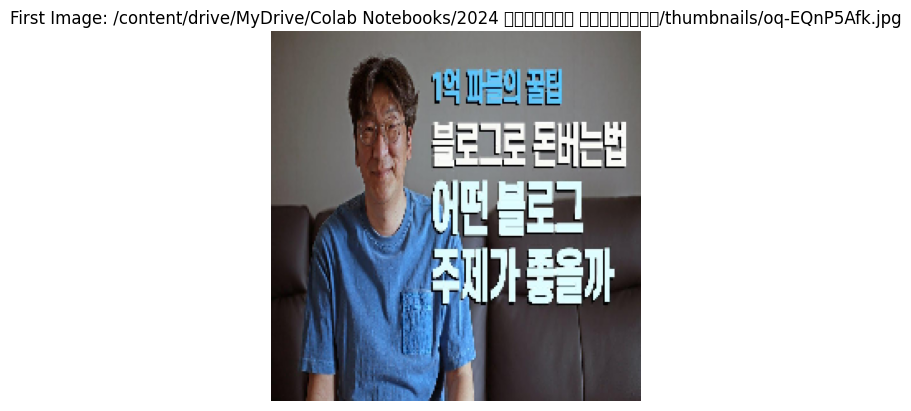

First image shape: (224, 224, 3)
Found 297 validated image filenames.
Found 75 validated image filenames.


In [ ]:
# 데이터를 DataFrame으로 변환
df = pd.DataFrame({'image_path': image_paths, 'views': views})

# 데이터를 학습 및 검증 세트로 분할
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# 첫 번째 이미지 로드 및 시각화 (확인용)
first_image_path = train_df['image_path'].iloc[0]
image = load_img(first_image_path, target_size=(224, 224))
image_array = img_to_array(image)

plt.imshow(image_array.astype('uint8'))
plt.title(f"First Image: {first_image_path}")
plt.axis('off')
plt.show()

print(f"First image shape: {image_array.shape}")

# 데이터 전처리 및 증강 설정
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

# 데이터 생성기
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='views',
    target_size=(224, 224),  # 이미지 크기를 224x224로 조정
    batch_size=32,
    class_mode='raw'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='views',
    target_size=(224, 224),  # 이미지 크기를 224x224로 조정
    batch_size=32,
    class_mode='raw'
)

## 일반 버전

Epoch 1/100
9/9 [==============================] - 9s 867ms/step - loss: 439126491136.0000 - val_loss: 435458572288.0000
Epoch 2/100
9/9 [==============================] - 6s 684ms/step - loss: 432347512832.0000 - val_loss: 427122360320.0000
Epoch 3/100
9/9 [==============================] - 7s 833ms/step - loss: 423864762368.0000 - val_loss: 417305296896.0000
Epoch 4/100
9/9 [==============================] - 6s 677ms/step - loss: 413085138944.0000 - val_loss: 405112029184.0000
Epoch 5/100
9/9 [==============================] - 6s 690ms/step - loss: 400578707456.0000 - val_loss: 389852266496.0000
Epoch 6/100
9/9 [==============================] - 8s 979ms/step - loss: 386587983872.0000 - val_loss: 375299768320.0000
Epoch 7/100
9/9 [==============================] - 6s 687ms/step - loss: 369503207424.0000 - val_loss: 357492129792.0000
Epoch 8/100
9/9 [==============================] - 9s 987ms/step - loss: 350275174400.0000 - val_loss: 337393483776.0000
Epoch 9/100
9/9 [===============

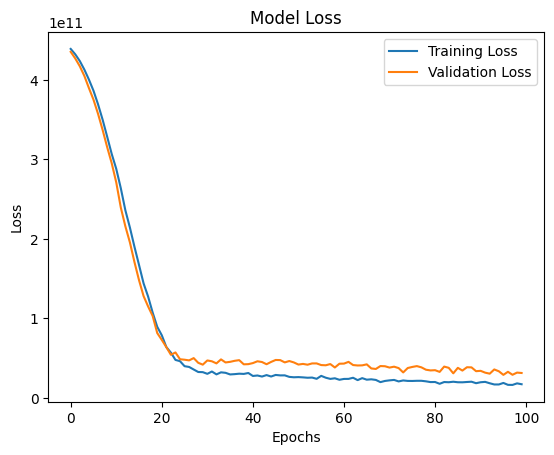

In [ ]:
# VGG16 기반 모델 로드 및 설정
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # 사전 훈련된 가중치는 고정. 즉, 모델의 맨 위쪽에 추가된 Flatten, Dense 레이어만 학습되고, VGG16 모델 자체의 가중치는 학습되지 않는다.
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_df) // 32,
    validation_data=val_generator,
    validation_steps=len(val_df) // 32,
    epochs=100  # 에포크 수를 늘려서 충분히 학습시킵니다.
)

# 학습 과정 시각화 (손실)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 가중치 조절 버전

In [ ]:
# VGG16 기반 모델 로드 및 설정
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 일부 레이어 고정 해제 (예시로 마지막 몇 레이어만 학습시키기)
for layer in base_model.layers[:-4]:  # 상위 N개의 레이어를 고정
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout 추가
predictions = Dense(1, activation='relu')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
optimizer = Adam(learning_rate=1e-4)  # 학습률 조정
model.compile(optimizer=optimizer, loss='mean_squared_error')

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_df) // 32,
    validation_data=val_generator,
    validation_steps=len(val_df) // 32,
    epochs=100  # 에포크 수를 늘려서 충분히 학습시킵니다.
)

# 학습 과정 시각화 (손실)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/100
9/9 [==============================] - 125s 14s/step - loss: 65625548390400.0000 - val_loss: 38506957111296.0000
Epoch 2/100
9/9 [==============================] - 8s 904ms/step - loss: 62965524987904.0000 - val_loss: 33986506129408.0000
Epoch 3/100
9/9 [==============================] - 6s 666ms/step - loss: 62155097374720.0000 - val_loss: 34726328926208.0000
Epoch 4/100
9/9 [==============================] - 8s 852ms/step - loss: 63222224781312.0000 - val_loss: 8525668941824.0000
Epoch 5/100
9/9 [==============================] - 6s 695ms/step - loss: 62113473101824.0000 - val_loss: 33005936574464.0000
Epoch 6/100
9/9 [==============================] - 7s 725ms/step - loss: 18243855056896.0000 - val_loss: 33312267567104.0000
Epoch 7/100
9/9 [==============================] - 8s 888ms/step - loss: 58979073916928.0000 - val_loss: 33185513603072.0000
Epoch 8/100
9/9 [==============================] - 6s 652ms/s

KeyboardInterrupt: 

In [ ]:
from datetime import datetime

# 현재 날짜와 시간을 포함하여 가중치 파일 이름 생성
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
model_save_path = os.path.join(drive_path, f'model_weights_{current_time}.h5')

# 학습된 모델 가중치를 구글 드라이브에 저장
model.save(model_save_path)
print(f"Model weights saved to {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model weights saved to /content/drive/MyDrive/2024 소융대 학술제/model_weights_20240517-201425.h5


# 모델 평가

In [ ]:
# 학습된 모델 평가 및 예측 함수 정의
def preprocess_image_from_url(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    image = image.resize((224, 224))
    image = np.array(image)
    image = np.expand_dims(image, axis=0)
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, Image.open(BytesIO(response.content))  # Return both preprocessed image and original image for display

def predict_views_from_url(model, image_url):
    image, original_image = preprocess_image_from_url(image_url)
    predicted_views = model.predict(image)[0][0]

    # 예측된 조회수 출력
    print(f"예측된 조회수: {predicted_views}")

    # 이미지를 시각적으로 출력
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted Views: {predicted_views}")
    plt.show()

    return predicted_views

# 모델 가중치를 불러와서 모델 구동
loaded_model = load_model("/content/drive/MyDrive/2024 소융대 학술제/model_weights_20240517-201425.h5")
print("Model loaded and ready for prediction.")

NameError: name 'load_model' is not defined

1/1 [==============================] - 0s 154ms/step
예측된 조회수: 638503.25


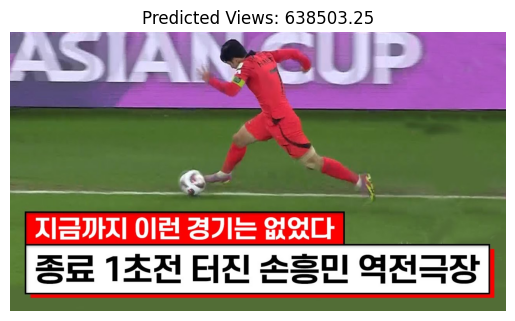

1/1 [==============================] - 0s 17ms/step
예측된 조회수: 652879.875


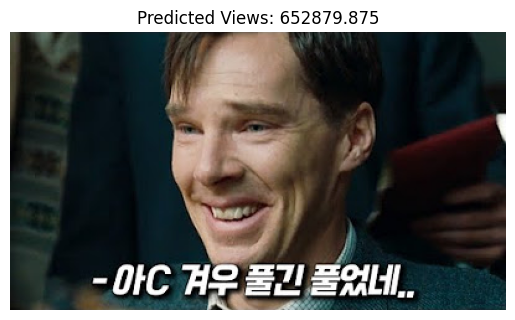

1/1 [==============================] - 0s 19ms/step
예측된 조회수: 730405.875


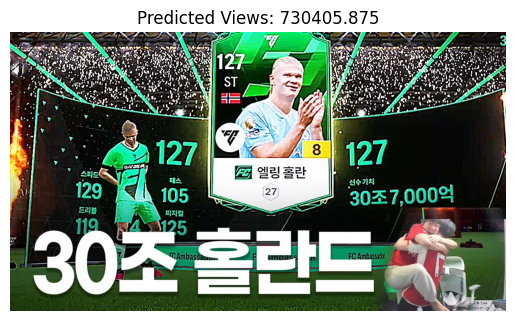

1/1 [==============================] - 0s 18ms/step
예측된 조회수: 632863.875


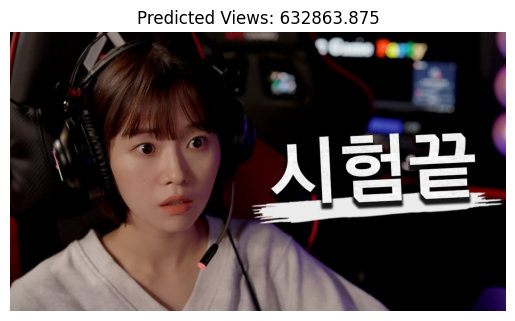

1/1 [==============================] - 0s 21ms/step
예측된 조회수: 790547.25


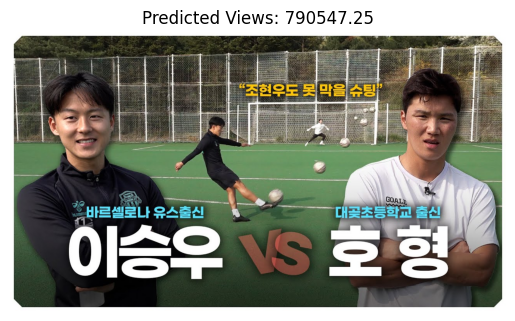

1/1 [==============================] - 0s 18ms/step
예측된 조회수: 802405.8125


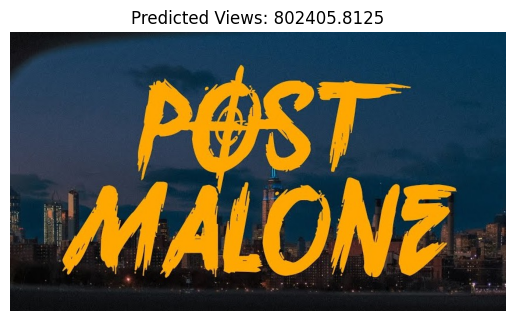

1/1 [==============================] - 0s 18ms/step
예측된 조회수: 619658.75


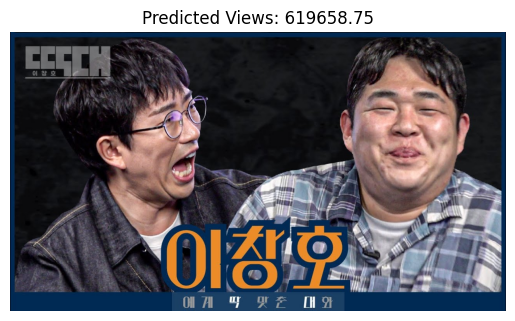

1/1 [==============================] - 0s 18ms/step
예측된 조회수: 631936.0


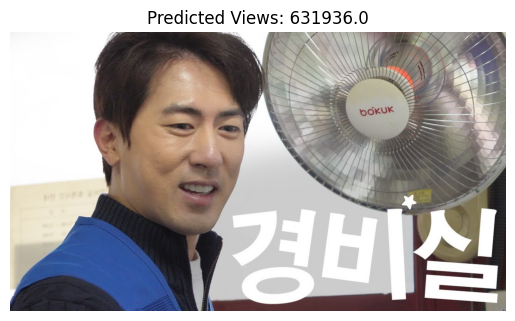

1/1 [==============================] - 0s 18ms/step
예측된 조회수: 716492.0


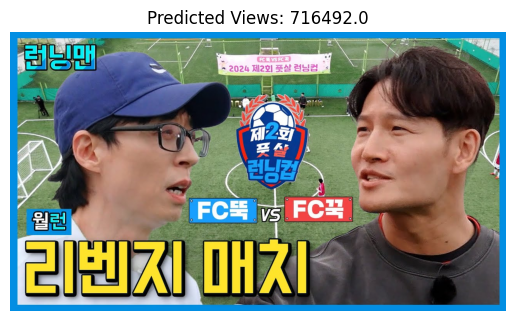

1/1 [==============================] - 0s 33ms/step
예측된 조회수: 632220.0


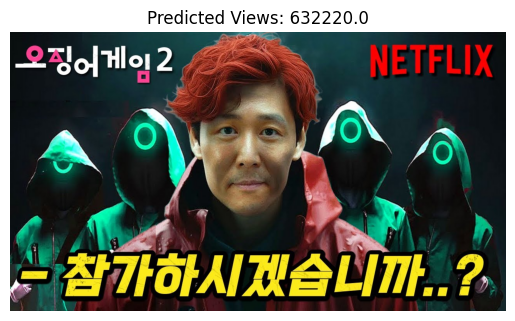

[638503.25, 652879.9, 730405.9, 632863.9, 790547.25, 802405.8, 619658.75, 631936.0, 716492.0, 632220.0]
Test MSE: 3473902282816.4146
Test MAE: 1107021.08125
Test R² Score: -0.2385480990275619


In [ ]:
# 예시 유튜브 URL 목록
youtube_urls = [
    'https://www.youtube.com/watch?v=ba6A5rg1Q4Q',
    'https://www.youtube.com/watch?v=vxSl286r-Ts',
    'https://www.youtube.com/watch?v=gfo4Z2cGYY4',
    'https://www.youtube.com/watch?v=N-HBE7ifMwU',
    'https://www.youtube.com/watch?v=5kqUu396u_Y',
    'https://www.youtube.com/watch?v=nC-LOD_OeFk',
    'https://www.youtube.com/watch?v=kfv0x1IkDsc',
    'https://www.youtube.com/watch?v=0kQzjDaDxZM',
    'https://www.youtube.com/watch?v=B9BVT9BibZg',
    'https://www.youtube.com/watch?v=-wJXOnRfuf4'
    # 추가 URL
]

# 유튜브 URL에서 썸네일 URL을 추출하고 예측 수행
def get_thumbnail_url(youtube_url):
    yt = YouTube(youtube_url)
    return yt.thumbnail_url

# 테스트 데이터셋 준비 (썸네일 URL과 실제 조회수)
test_data = []
for url in youtube_urls:
    try:
        yt = YouTube(url)
        thumbnail_url = yt.thumbnail_url
        views = yt.views
        test_data.append((thumbnail_url, views))
    except Exception as e:
        print(f"Error processing {url}: {str(e)}")

# 테스트 데이터셋 예측 및 평가지표 계산
test_urls, test_true_views = zip(*test_data)
test_pred_views = [predict_views_from_url(loaded_model, url) for url in test_urls]
print(test_pred_views)

# 평가지표 계산
mse = mean_squared_error(test_true_views, test_pred_views)
mae = mean_absolute_error(test_true_views, test_pred_views)
r2 = r2_score(test_true_views, test_pred_views)

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"Test R² Score: {r2}")

# 예측 수행

In [ ]:
# 설치해야 할 라이브러리 설치
!pip install pillow
!pip install requests

import requests
from PIL import Image
from io import BytesIO

# 이미지 URL 리스트
# 백에서 전달받은 url
urls = [
    "https://i.ytimg.com/vi/3oKRjKCX-6Q/default.jpg",
    "https://i.ytimg.com/vi/oznQTnUwiXw/default.jpg",
    "https://i.ytimg.com/vi/ITbFRNIZBIY/default.jpg",
    "https://i.ytimg.com/vi/hzcD1T_-XK4/default.jpg",
    "https://i.ytimg.com/vi/7ZZ4J5ai-vU/default.jpg",
    "https://i.ytimg.com/vi/Jbge8X7s3RI/default.jpg",
    "https://i.ytimg.com/vi/IStg6vUuqHs/default.jpg",
    "https://i.ytimg.com/vi/JklD0IDXEr8/default.jpg",
    "https://i.ytimg.com/vi/qzkTUHzqZC0/default.jpg",
    "https://i.ytimg.com/vi/-vv2LgzwOzk/default.jpg",
    "https://i.ytimg.com/vi/OC7FroKlGYk/default.jpg",
    "https://i.ytimg.com/vi/0e4K9ifam8I/default.jpg",
    "https://i.ytimg.com/vi/iPwajsJ7Z8E/default.jpg",
    "https://i.ytimg.com/vi/CcEZB6LeNDE/default.jpg",
    "https://i.ytimg.com/vi/DuT-GhMbOa4/default.jpg",
    "https://i.ytimg.com/vi/nD9ujr8d5Gw/default.jpg",
    "https://i.ytimg.com/vi/JZ1zvqc1O0U/default.jpg",
    "https://i.ytimg.com/vi/m4XboPO7c1o/default.jpg",
    "https://i.ytimg.com/vi/-NgDqYPMde0/default.jpg",
    "https://i.ytimg.com/vi/1JTTV9XLRgQ/default.jpg",
    "https://i.ytimg.com/vi/_bAP1aFsiAQ/default.jpg",
    "https://i.ytimg.com/vi/6BJ-agAQazg/default.jpg",
    "https://i.ytimg.com/vi/O0Va4lDuy70/default.jpg",
    "https://i.ytimg.com/vi/g_SQys3PGdM/default.jpg",
    "https://i.ytimg.com/vi/uUrlzczWdNg/default.jpg",
    "https://i.ytimg.com/vi/FOsZJTo83hw/default.jpg",
    "https://i.ytimg.com/vi/iaGdL6Fw57g/default.jpg",
    "https://i.ytimg.com/vi/OuFWzP1HlkE/default.jpg",
    "https://i.ytimg.com/vi/syKCUxk4usI/default.jpg",
    "https://i.ytimg.com/vi/bwmvnY-ByR0/default.jpg",
    "https://i.ytimg.com/vi/fpF1Xijcn-w/default.jpg",
    "https://i.ytimg.com/vi/rpuBRfpg_nE/default.jpg",
    "https://i.ytimg.com/vi/IbcH71NDESI/default.jpg",
    "https://i.ytimg.com/vi/cf6c2QUrajA/default.jpg",
    "https://i.ytimg.com/vi/yJRxw8nNiEM/default.jpg",
    "https://i.ytimg.com/vi/FhA37Sw4j8w/default.jpg",
    "https://i.ytimg.com/vi/gS9iF3Y4LOc/default.jpg",
    "https://i.ytimg.com/vi/XT4cmW5bqeY/default.jpg",
    "https://i.ytimg.com/vi/PjuDK8apK1Y/default.jpg",
    "https://i.ytimg.com/vi/78PYfoAKEzY/default.jpg",
    "https://i.ytimg.com/vi/H99YIZeT-bs/default.jpg",
    "https://i.ytimg.com/vi/HP0a4pkXM3Q/default.jpg",
    "https://i.ytimg.com/vi/IMScHOUw54g/default.jpg",
    "https://i.ytimg.com/vi/G4uMy_hfYoY/default.jpg",
    "https://i.ytimg.com/vi/PlioD7JldD4/default.jpg",
    "https://i.ytimg.com/vi/4eLGUNyQBMo/default.jpg",
    "https://i.ytimg.com/vi/3zIR0PMWevQ/default.jpg",
    "https://i.ytimg.com/vi/e5nYBnPxjO8/default.jpg",
    "https://i.ytimg.com/vi/fWV4f7kLo_0/default.jpg",
    "https://i.ytimg.com/vi/h_oSIEmfQoU/default.jpg",
    "https://i.ytimg.com/vi/3oKRjKCX-6Q/default.jpg",
    "https://i.ytimg.com/vi/ITbFRNIZBIY/default.jpg",
    "https://i.ytimg.com/vi/IStg6vUuqHs/default.jpg",
    "https://i.ytimg.com/vi/Jbge8X7s3RI/default.jpg",
    "https://i.ytimg.com/vi/hzcD1T_-XK4/default.jpg",
    "https://i.ytimg.com/vi/7ZZ4J5ai-vU/default.jpg",
    "https://i.ytimg.com/vi/qzkTUHzqZC0/default.jpg",
    "https://i.ytimg.com/vi/JklD0IDXEr8/default.jpg",
    "https://i.ytimg.com/vi/-vv2LgzwOzk/default.jpg",
    "https://i.ytimg.com/vi/iPwajsJ7Z8E/default.jpg",
    "https://i.ytimg.com/vi/OC7FroKlGYk/default.jpg",
    "https://i.ytimg.com/vi/sU3W3McTJL8/default.jpg",
    "https://i.ytimg.com/vi/3BNiGFavnGU/default.jpg",
    "https://i.ytimg.com/vi/v6TxSu_R6k0/default.jpg",
    "https://i.ytimg.com/vi/on09zv-ujyc/default.jpg",
    "https://i.ytimg.com/vi/nD9ujr8d5Gw/default.jpg",
    "https://i.ytimg.com/vi/JZ1zvqc1O0U/default.jpg",
    "https://i.ytimg.com/vi/1JTTV9XLRgQ/default.jpg",
    "https://i.ytimg.com/vi/6BJ-agAQazg/default.jpg",
    "https://i.ytimg.com/vi/O0Va4lDuy70/default.jpg",
    "https://i.ytimg.com/vi/g_SQys3PGdM/default.jpg",
    "https://i.ytimg.com/vi/m4XboPO7c1o/default.jpg",
    "https://i.ytimg.com/vi/FOsZJTo83hw/default.jpg",
    "https://i.ytimg.com/vi/syKCUxk4usI/default.jpg",
    "https://i.ytimg.com/vi/cf6c2QUrajA/default.jpg",
    "https://i.ytimg.com/vi/bwmvnY-ByR0/default.jpg",
    "https://i.ytimg.com/vi/fpF1Xijcn-w/default.jpg",
    "https://i.ytimg.com/vi/IbcH71NDESI/default.jpg",
    "https://i.ytimg.com/vi/yJRxw8nNiEM/default.jpg",
    "https://i.ytimg.com/vi/FhA37Sw4j8w/default.jpg",
    "https://i.ytimg.com/vi/gS9iF3Y4LOc/default.jpg",
    "https://i.ytimg.com/vi/PjuDK8apK1Y/default.jpg",
    "https://i.ytimg.com/vi/78PYfoAKEzY/default.jpg",
    "https://i.ytimg.com/vi/HP0a4pkXM3Q/default.jpg",
    "https://i.ytimg.com/vi/IMScHOUw54g/default.jpg",
    "https://i.ytimg.com/vi/G4uMy_hfYoY/default.jpg",
    "https://i.ytimg.com/vi/4eLGUNyQBMo/default.jpg",
    "https://i.ytimg.com/vi/3zIR0PMWevQ/default.jpg",
    "https://i.ytimg.com/vi/gnCYBD4t08g/default.jpg",
    "https://i.ytimg.com/vi/h_oSIEmfQoU/default.jpg",
    "https://i.ytimg.com/vi/1t7Adam0-y0/default.jpg",
    "https://i.ytimg.com/vi/H99YIZeT-bs/default.jpg",
    "https://i.ytimg.com/vi/rpuBRfpg_nE/default.jpg",
    "https://i.ytimg.com/vi/uUrlzczWdNg/default.jpg",
    "https://i.ytimg.com/vi/Xe_riytJDtM/default.jpg",
    "https://i.ytimg.com/vi/MjzRmjMpKHw/default.jpg",
    "https://i.ytimg.com/vi/xrWgxffyub0/default.jpg",
    "https://i.ytimg.com/vi/5QVLEqaqBrM/default.jpg",
    "https://i.ytimg.com/vi/thpJBahAjHo/default.jpg",
    "https://i.ytimg.com/vi/XT4cmW5bqeY/default.jpg"
]


predictions = [predict_views_from_url(loaded_model, url) for url in test_urls]

# URL과 예측값을 매칭하는 리스트를 생성합니다.
url_predictions = list(zip(urls, predictions))

# 예측값을 기준으로 내림차순 정렬합니다.
sorted_url_predictions = sorted(url_predictions, key=lambda x: x[1], reverse=True)

# URL과 예측값 출력
for url, prediction in sorted_url_predictions:
    print(f" {url},  {prediction}")

Model loaded and ready for prediction.
1/1 [==============================] - 0s 133ms/step
예측된 조회수: 1358376.25


In [ ]:
top_9_urls = [url for url, _ in sorted_url_predictions[:9]]

# 상위 9개의 URL을 한 줄로 출력
print("urls = [")
for url in top_9_urls:
    print(f'"{url}",')
print("]")

In [ ]:
import requests

def get_search_results():
    url = 'http://172.16.56.164:8080/youtube'  # 자바 서버의 엔드포인트 URL로 변경하세요
    response = requests.post(url)

    if response.status_code == 200:
        # JSON 형식의 데이터를 파이썬 리스트로 변환
        result_list = response.json()
        # 결과 리스트를 출력하거나 원하는 대로 처리
        print("Search results:", result_list)
    else:
        print("Failed to get search results.")

if __name__ == "__main__":
    get_search_results()